# Load Libraries

In [ ]:
from os.path import exists
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import os


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

enable_graphs = False

# Load Data

In [ ]:
if exists('./data/cleaned_car_prices.csv'):
    pass
else:
    input_file = './data/car_prices.csv'
    output_file = './data/screened_car_prices.csv'
    expected_fields = 16

    # Create a screened CSV file
    with open(input_file, 'r', newline='', encoding='utf-8') as infile, open(output_file, 'w', newline='', encoding='utf-8') as outfile:
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            if len(row) == expected_fields:
                writer.writerow(row)

    # Load the cleaned file into a Pandas DataFrame
    df = pd.read_csv(output_file)

    df.info()
    print()
    print("First 5 rows:")
    df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB

First 5 rows:


## Missing Values

In [ ]:
if exists('./data/cleaned_car_prices.csv'):
    pass
else:    
    # Check for missing values
    missing_values = pd.DataFrame({
        'Num of Missing Values' : df.isnull().sum(), 
        'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2)
    })

    if enable_graphs:
        display(missing_values)

    # Drop missing values
    df = df.dropna(subset=['make','model', 'trim', 'body', 'odometer', 'color', 'interior', 'transmission', 'condition'])

    # Double check for missing values
    missing_values_drop = pd.DataFrame({
        'Num of Missing Values' : df.isnull().sum(),
        'Percentage of Missing Values' : (df.isnull().sum()/len(df) * 100).round(2)
    })

    if enable_graphs:
        display(missing_values_drop)
        df.info()

    # Write cleaned data to a new csv
    output_file = './data/cleaned_car_prices.csv'
    df.to_csv(output_file, index=False, encoding='utf-8')
   
    # Remove old screned data file
    if exists('./data/screened_car_prices.csv'):
        os.remove('./data/screened_car_prices.csv')

In [ ]:
if enable_graphs:
    # Print the name and count for the 'make' column
    make_counts = df['make'].value_counts()
    print("Make counts:")
    print(make_counts)
    print("\n")

    # Print the name and count for the 'model' column
    model_counts = df['model'].value_counts()
    print("Model counts:")
    print(model_counts)
    print("\n")

    # Print the name and count for the 'trim' column
    trim_counts = df['trim'].value_counts()
    print("Trim counts:")
    print(trim_counts)
    print("\n")

    # Convert the 'body' column to title case (each word starts with an uppercase letter)
    df['body'] = df['body'].str.title()
    # Print the name and count for the 'body' column
    body_counts = df['body'].value_counts()
    print("Body counts:")
    print(body_counts)
    print("\n")

    # Print the name and count for the 'color' column
    color_counts = df['color'].value_counts()
    print("Color counts:")
    print(color_counts)
    print("\n")
    
    # Print the name and count for the 'interior' column
    interior_counts = df['interior'].value_counts()
    print("Interior counts:")
    print(interior_counts)
    print("\n")


## Data Analysis

In [ ]:
if enable_graphs:
    # List of columns for bar charts (categorical columns)
    categorical_features = ['make', 'model', 'trim', 'body', 'grouped_body', 'transmission', 'state', 'color', 'interior']

    # List of columns for histograms (numeric columns)
    numeric_features = ['year', 'condition', 'odometer', 'mmr', 'sellingprice', 'sale_hour', 'sale_day', 'sale_month', 'sale_year', 'sale_day_of_week']


    # Create bar charts for each categorical column
    for column in categorical_features:
        plt.figure(figsize=(8, 4))
        df[column].value_counts().head(30).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Bar Chart of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    # Create histograms for each numeric column
    for column in numeric_features:
        plt.figure(figsize=(8, 4))
        df[column].hist(bins=30, edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xlim(left=df[column].min(), right=df[column].max())  # Set x-axis limits
        plt.tight_layout()
        plt.show()

## Correlation Analysis

In [ ]:
if enable_graphs:
    # Select relevant columns (you can adjust this list based on your needs)
    scatter_matrix_data = df[numeric_features]

    # Create a scatterplot matrix (pairplot)
    sns.pairplot(scatter_matrix_data)
    plt.suptitle('Scatterplot Matrix of Variables to Selling Price', y=1.02)  # Adjust the title position
    plt.show()

    correlation_data = df[numeric_features]

    # Calculate the correlation matrix
    correlation_matrix = correlation_data.corr()

    # Set up the matplotlib figure
    plt.figure(figsize=(10, 8))

    # Create a heatmap
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)

    # Set the title
    plt.title('Heatmap of Quantitative Variables Correlation with Selling Price')
    plt.show()

    # Create box plots for each categorical variable against sellingprice
    for column in categorical_features:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x=column, y='sellingprice', data=df)
        plt.title(f'Box Plot of Selling Price by {column}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# Adding Features

In [ ]:
# Define a mapping function for the broader categories
def group_body_type(body):
    if 'sedan' in body.lower():
        return 'Sedan'
    elif 'suv' in body.lower():
        return 'SUV'
    elif 'hatchback' in body.lower():
        return 'Hatchback'
    elif 'coupe' in body.lower():
        return 'Coupe'
    elif any(cab in body.lower() for cab in ['crew cab', 'extended cab', 'regular cab', 'quad cab', 'king cab', 'double cab', 'mega cab', 'cab plus']):
        return 'Cab'
    elif 'wagon' in body.lower():
        return 'Wagon'
    elif 'convertible' in body.lower():
        return 'Convertible'
    elif 'van' in body.lower():
        return 'Van'
    else:
        return 'Other'

def add_features_to(df):
    # Apply the mapping to the 'body' column
    df['grouped_body'] = df['body'].apply(group_body_type)

    # Convert the 'salesdate' column to datetime
    df['saledate'] = pd.to_datetime(df['saledate'], utc=True, errors='coerce')

    # Calculate the vehicle's age
    df['vehicle_age'] = df['saledate'].dt.year - df['year'] + 1

    # Replace 'charcoal', 'turquoise', 'pink', and 'lime' with 'Other'
    df['color'] = df['color'].replace(['charcoal', 'turquoise', 'pink', 'lime', '—'], 'Other')
    
    # Replace the specified interiors with 'Other'
    df['interior'] = df['interior'].replace(['blue', 'off-white', 'gold', 'purple', 'white', 
                'green', 'burgundy', 'orange', 'yellow', '—'], 'Other')
    
    return df

# Load the feature extracted files if they've already been generated
if exists('./data/train.csv'):
    train_df = pd.read_csv("./data/train.csv")
else:
    # Load dataset
    train_df = pd.read_csv('./data/cleaned_car_prices.csv')
    
    # Add feature
    train_df = add_features_to(train_df)

    # Save feature-processed data for later use
    train_df.to_csv("./data/train.csv", index=False)

C:\Users\etanm\AppData\Local\Temp\ipykernel_12808\1984572027.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], utc=True, errors='coerce')


# Post-Feature Adding Stats

In [ ]:
# Summarize the counts for the new categories
grouped_body_counts = train_df['grouped_body'].value_counts()
print("Grouped Body Counts:")
print(grouped_body_counts)
print("\n")

# Print the name and count for the 'color' column
color_counts = train_df['color'].value_counts()
print("Color counts:")
print(color_counts)
print("\n")

# Print the name and count for the 'interior' column
interior_counts = train_df['interior'].value_counts()
print("Interior counts:")
print(interior_counts)
print("\n")

Grouped Body Counts:
grouped_body
Sedan          218247
SUV            120968
Cab             27804
Van             26633
Hatchback       23821
Coupe           17999
Wagon           14264
Other           12854
Convertible      9746
Name: count, dtype: int64


Color counts:
color
black        93245
white        89236
silver       71255
gray         70643
blue         43060
red          37336
Other        22738
gold          9563
green         9234
burgundy      7605
beige         7444
brown         5621
orange        1763
purple        1270
off-white     1244
yellow        1079
Name: count, dtype: int64


Interior counts:
interior
black     209870
gray      152621
beige      50469
tan        37723
Other      12421
brown       7102
red         1128
silver      1002
Name: count, dtype: int64




# Modeling

In [ ]:
X = train_df.drop(columns=['sellingprice', 'vin', 'saledate', 'mmr', 'transmission', 'body'])  # Exclude unique identifiers
y = train_df['sellingprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


categorical_features_to_use = ['make', 'model', 'trim', 'grouped_body', 'state', 'color', 'interior', 'seller']
numeric_features_to_use = ['year', 'condition', 'odometer', 'vehicle_age']


# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_to_use),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features_to_use)
    ]
)

# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(y_test, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, label="Predictions", color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction")
    plt.title(f"Actual vs Predicted Prices ({model_name})")
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.legend()
    plt.grid(True)
    plt.show()

## Linear Regression

In [ ]:
# Linear Regressor Pipeline
linear_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train the model
linear_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'condition',
                                                   'odometer', 'vehicle_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'trim',
                                                   'grouped_body', 'state',
                                                   'color', 'interior',
                                                   'seller'])])),
                ('regressor', LinearRegression())])

Linear Regression Model:
Mean Squared Error: 9846186.117893541
Root Mean Squared Error: 3137.8633045264323
Mean Absolute Error: 1967.5394585669785
R^2 Score: 0.8935092618459147


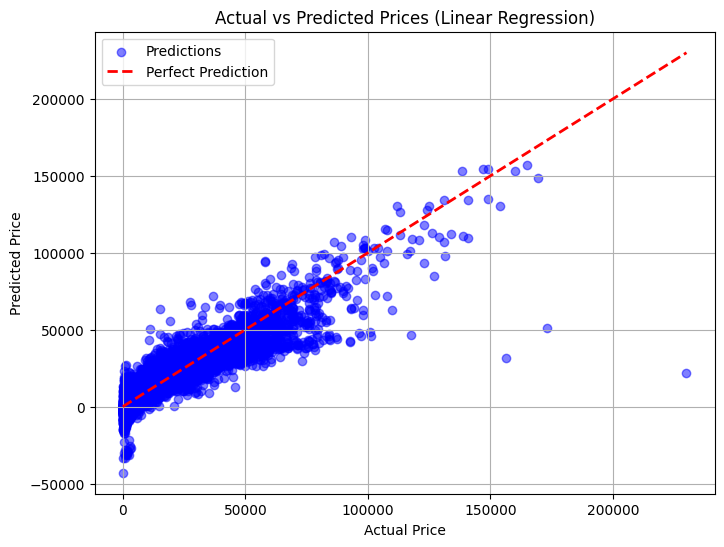

In [ ]:
# Make predictions
y_pred_linear = linear_model.predict(X_test)

# Calculate evaluation metrics
mse_linear = mean_squared_error(y_test, y_pred_linear)
rmse_linear = mse_linear ** 0.5
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Linear Regression Model:")
print(f"Mean Squared Error: {mse_linear}")
print(f"Root Mean Squared Error: {rmse_linear}")
print(f"Mean Absolute Error: {mae_linear}")
print(f"R^2 Score: {r2_linear}")

# Plot for Linear Regression
plot_actual_vs_predicted(y_test, y_pred_linear, "Linear Regression")

## Ridge Regression

In [ ]:
# Ridge Regressor Pipeline
ridge_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Train the model
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'condition',
                                                   'odometer', 'vehicle_age']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'trim',
                                                   'grouped_body', 'state',
                                                   'color', 'interior',
                                                   'seller'])])),
                ('regressor', Ridge())])

Ridge Regression Model:
Mean Squared Error: 9722710.621875463
Root Mean Squared Error: 3118.1261395067813
Mean Absolute Error: 1956.5445869807247
R^2 Score: 0.8948447024477343


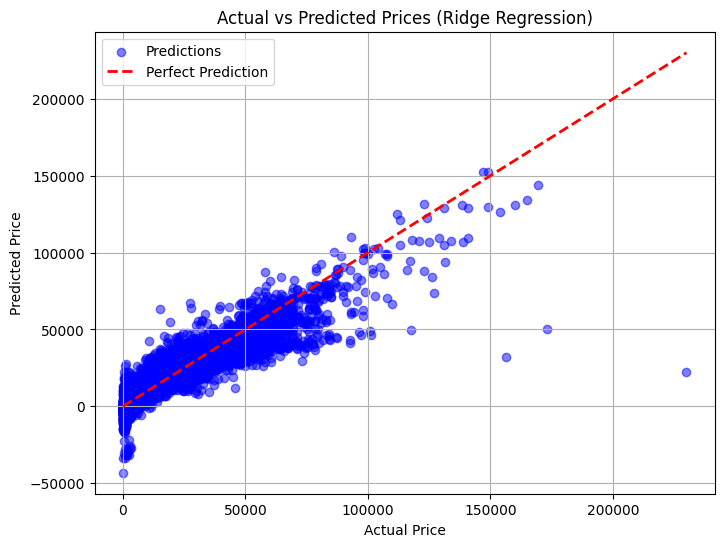

In [ ]:
# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

# Calculate evaluation metrics for Ridge Regression
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Ridge Regression Model:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"Root Mean Squared Error: {rmse_ridge}")
print(f"Mean Absolute Error: {mae_ridge}")
print(f"R^2 Score: {r2_ridge}")

# Plot for Ridge Regression
plot_actual_vs_predicted(y_test, y_pred_ridge, "Ridge Regression")

## Lasso Regression

In [ ]:
# # Lasso Regressor Pipeline
# lasso_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', Lasso(max_iter=10000))
# ])

# # Train the model
# lasso_model.fit(X_train, y_train)

In [ ]:
# # Make predictions
# y_pred_lasso = lasso_model.predict(X_test)

# # Calculate evaluation metrics for Lasso Regression
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# rmse_lasso = mse_lasso ** 0.5
# mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
# r2_lasso = r2_score(y_test, y_pred_lasso)

# print("Lasso Regression Model:")
# print(f"Mean Squared Error: {mse_lasso}")
# print(f"Root Mean Squared Error: {rmse_lasso}")
# print(f"Mean Absolute Error: {mae_lasso}")
# print(f"R^2 Score: {r2_lasso}")

# # Plot for Lasso Regression
# plot_actual_vs_predicted(y_test, y_pred_lasso, "Lasso Regression")

## Random Forest Regression

In [ ]:
# # Random Forest Regressor Pipeline
# rf_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
# ])

# # Train the model
# rf_model.fit(X_train, y_train)

In [ ]:
# # Make predictions
# y_pred_rf = rf_model.predict(X_test)

# # Evaluate the model
# mse_rf = mean_squared_error(y_test, y_pred_rf)
# rmse_rf = mse_rf ** 0.5
# r2_rf = r2_score(y_test, y_pred_rf)
# mae_rf = mean_absolute_error(y_test, y_pred_rf)

# print(f"Random Forest Regressor:")
# print(f"Mean Squared Error: {mse_rf}")
# print(f"Root Mean Squared Error: {rmse_rf}")
# print(f"R^2 Score: {r2_rf}")
# print(f"Mean Absolute Error: {mae_rf}")

# # Plot for Random Forest Regression
# plot_actual_vs_predicted(y_test, y_pred_rf, "Random Forest Regressor")

## XGBoost Regression

In [ ]:
# # XGBoost Regressor Pipeline
# xgb_model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', XGBRegressor(
#         random_state=42,
#         n_estimators=100,  # Number of boosting rounds
#         learning_rate=0.1,  # Step size shrinkage
#         max_depth=6,        # Maximum depth of trees
#         objective='reg:squarederror'  # Regression loss
#     ))
# ])

# # Train the model
# xgb_model.fit(X_train, y_train)

In [ ]:
# # Make predictions
# y_pred_xgb = xgb_model.predict(X_test)

# # Evaluate the model
# mse_xgb = mean_squared_error(y_test, y_pred_xgb)
# rmse_xgb = mse_xgb ** 0.5
# r2_xgb = r2_score(y_test, y_pred_xgb)
# mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# print(f"XGBoost Regressor:")
# print(f"Mean Squared Error: {mse_xgb}")
# print(f"Root Mean Squared Error: {rmse_xgb}")
# print(f"R^2 Score: {r2_xgb}")
# print(f"Mean Absolute Error: {mae_xgb}")

# # Plot actual vs predicted prices for XGBoost
# plot_actual_vs_predicted(y_test, y_pred_xgb, "XGBoost Regressor")